<a href="https://colab.research.google.com/github/starsup2016/bedudatabaseproject/blob/main/Bedu_Data_Science_Project01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Schema creation**
## In this stage we create the schema using the MySQL Workbench features.

>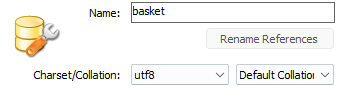

# **Importing Data**
## Using the wizard from MySQL, all the tables were created

* **The file to Import**

>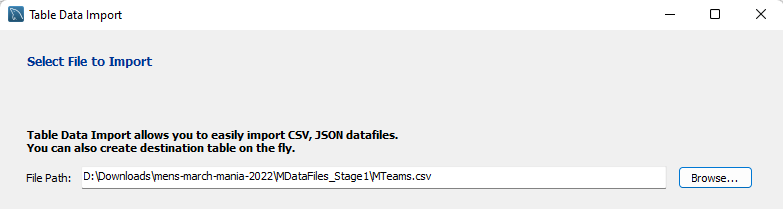

* **Selecting the destination table**

>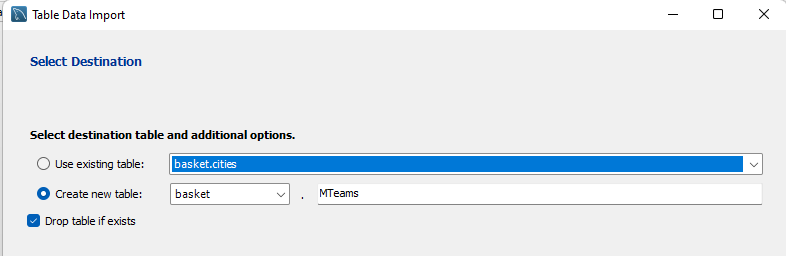

* **Importing Settings**

>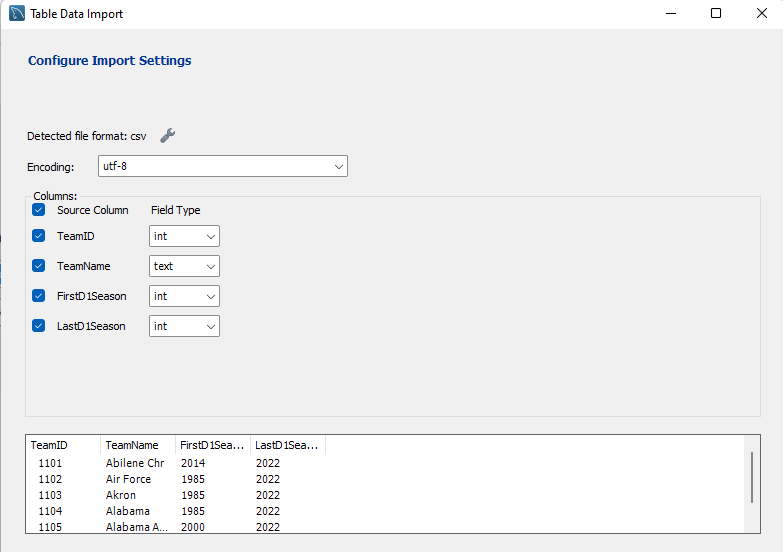

### An importan step was the selection of data type for each field and the use of charset. Since the origin of data was set for UTF8 and the Data set describes the type of data contained, the assigning of the fields was automatic.

# **SQL Instructions**
### Since all the tables were created using the import wizard, there are some task that needed to be executed.
* Add primary Keys to the corresponding tables (cities, mteams, conferences)
``` SQL
alter table cities add primary key (CityID);
alter table mteams add primary key (TeamID);
alter table conferences add primary key (ConfAbbrev);
```
* Add foreign Keys to the corresponding tables (mregularseasoncompactresults, mteamcoaches)
``` SQL
alter table mregularseasoncompactresults add foreign key (WTeamID) references mteams(TeamID);
alter table mregularseasoncompactresults add foreign key (LTeamID) references mteams(TeamID);
alter table mteamcoaches add foreign key (TeamID) references mteams(TeamID);
```
* Update the field 'ConfAbbrev' to be able to assign as primary key by changing the lenght of the data. To get the max lenght of the field a regular query was used
``` SQL
select length(ConfAbbrev) as lo from conferences order by lo desc;
alter table conferences modify column ConfAbbrev varchar(10);
```

# **General Questions**
* Get max number of seasons per coach
```SQL
select CoachName, count(CoachName) as num from mteamcoaches group by CoachName order by num desc;
```
* Get seasons per each Coach Name
```SQL
select CoachName, season from mteamcoaches where CoachName = 'aaron_james' order by CoachName, season asc;
```
* Get the top 5 total wins per team and show its name
```SQL
select b.TeamName, count(a.WTeamID) as MostWin from mregularseasoncompactresults as a join mteams as b on WTeamID = TeamID group by b.TeamName order by MostWin Desc limit 5;
```
* Get the top 5 total losses per team and show its name
```SQL
select b.TeamName, count(a.LTeamID) as MostLosses from mregularseasoncompactresults as a join mteams as b on LTeamID = TeamID group by b.TeamName order by MostLosses Desc limit 5;
```
* Let get the total wins per coach per team
```SQL
select c.CoachName, b.TeamName, count(a.WTeamID) as MostWin from mteamcoaches as c join mteams as b join mregularseasoncompactresults as a on a.WTeamID = b.TeamID on c.TeamID = b.TeamID Group by c.CoachName, b.TeamName order by c.CoachName, MostWin;
```
* Get the avg wins per team
```SQL
select b.TeamName, avg(a.WTeamID) as Average from mregularseasoncompactresults as a join mteams as b on WTeamID = TeamID group by b.TeamName order by b.TeamName Desc;
```
* Get the avg losses per team
```SQL
select b.TeamName, avg(a.LTeamID) as Average from mregularseasoncompactresults as a join mteams as b on LTeamID = TeamID group by b.TeamName order by b.TeamName Desc;
```

# Dataset Information
* [Kaggle Dataset information](https://www.kaggle.com/competitions/mens-march-mania-2022/data)
* [Repository Information held in Github]()

## Considerations
* There was not tournament during year 2020